[Reading classics - Python Machine Learning](https://github.com/rasbt/python-machine-learning-book-3rd-edition/blob/master/ch11/ch11.ipynb)

In [1]:
from IPython.display import display,HTML
def dhtml(str):
    display(HTML("""<style>
    @import 'https://fonts.googleapis.com/css?family=Akronim&effect=3d';      
    </style><h1 class='font-effect-3d' 
    style='font-family:Akronim; color:#aa33ff; font-size:35px;'>
    %s</h1>"""%str))

In [2]:
dhtml('Code Modules & Settings')

In [3]:
import warnings; warnings.filterwarnings('ignore')
import sklearn.datasets as sds
import sklearn.cluster as scl
import sklearn.metrics as sme
import numpy as np,pandas as pd,pylab as pl
from IPython.core.magic import register_line_magic
from scipy.spatial.distance import pdist,squareform
from scipy.cluster.hierarchy import linkage,dendrogram

In [4]:
dhtml('Data')

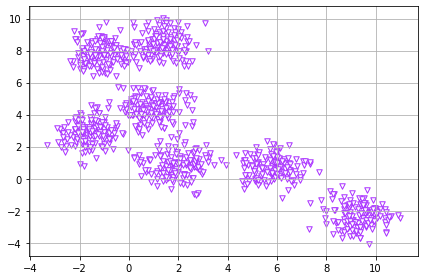

In [5]:
N=1000; n_clusters=7
X,y=sds.make_blobs(n_samples=N,n_features=2, 
                   centers=n_clusters,cluster_std=.7, 
                   shuffle=True,random_state=0)
pl.scatter(X[:,0],X[:,1],
           c='white',marker='v',
           edgecolor='#aa33ff',s=30)
pl.grid(); pl.tight_layout();

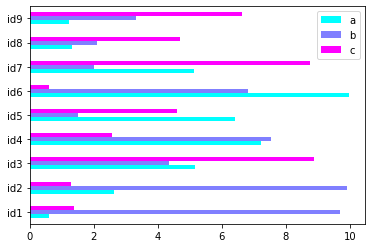

In [6]:
variables=['a','b','c']
labels=['id'+str(i) for i in range(1,10)]
X2=np.random.random_sample([9,3])*10
df=pd.DataFrame(X2,columns=variables,index=labels)
df.plot(kind='barh',cmap='cool');

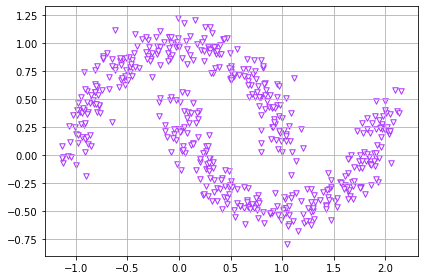

In [7]:
X3,y3=sds.make_moons(n_samples=500,noise=.1,
                     random_state=0)
pl.scatter(X3[:,0],X3[:,1],
           c='white',marker='v',
           edgecolor='#aa33ff',s=30)
pl.tight_layout(); pl.grid(); pl.show()

In [8]:
dhtml('Clustering')

In [9]:
km,y_km=[],[]
@register_line_magic
def kmeans_clusters(c):
    n_clusters=int(c)
    global km,y_km
    km=scl.KMeans(n_clusters=n_clusters,
                  init='k-means++',n_init=10,
                  max_iter=500,tol=1e-04,
                  random_state=0)
    y_km=km.fit_predict(X)

In [10]:
%kmeans_clusters 7

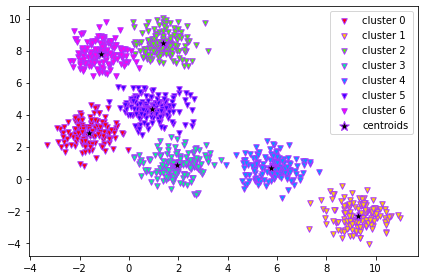

In [11]:
for i in range(n_clusters):
    color=pl.cm.hsv(float(i)/n_clusters)
    pl.scatter(X[y_km==i,0],X[y_km==i,1],
               s=30,color=color,marker='v',
               edgecolor='#aa33ff',
               label='cluster %d'%i)
pl.scatter(km.cluster_centers_[:,0],
           km.cluster_centers_[:,1],
           s=100, marker='*',c='black',
           edgecolor='#aa33ff',label='centroids')
pl.legend(scatterpoints=1); pl.tight_layout();

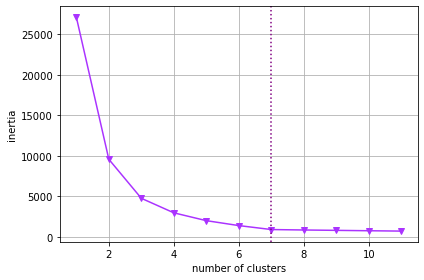

In [12]:
iner=[]
for i in range(1,12):
    km=scl.KMeans(n_clusters=i,init='k-means++',
                  n_init=10,max_iter=500, 
                  random_state=0)
    km.fit(X);iner.append(km.inertia_)
pl.plot(range(1,12),iner,marker='v',c='#aa33ff')
pl.xlabel('number of clusters')
pl.axvline(7,color='purple',linestyle=':')
pl.ylabel('inertia')
pl.tight_layout(); pl.grid()

In [13]:
@register_line_magic
def silhouette_plots(n):
    n_clusters=int(n); labels=np.unique(y_km)
    svalues=sme.\
    silhouette_samples(X,y_km,metric='euclidean')
    y_ax_lower,y_ax_upper=0,0; yticks=[]
    for i,c in enumerate(labels):
        c_svalues=svalues[y_km==c]
        c_svalues.sort()
        y_ax_upper+=len(c_svalues)
        color=pl.cm.cool(float(i)/n_clusters)
        pl.barh(range(y_ax_lower,y_ax_upper),
                c_svalues,height=1., 
                edgecolor='none',color=color)
        yticks.append((y_ax_lower+y_ax_upper)/2.)
        y_ax_lower+=len(c_svalues)
    savg=np.mean(svalues)
    pl.axvline(savg, color="red",linestyle="--") 
    pl.yticks(yticks,labels+1)
    pl.ylabel('clusters')
    pl.xlabel('silhouette coefficients')
    pl.tight_layout(); pl.show()

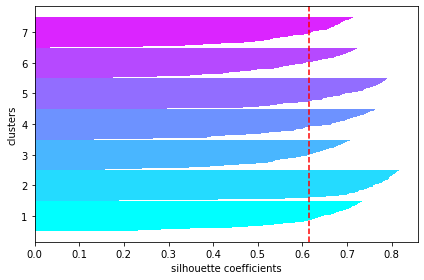

In [14]:
#well-fitted cluster amount
%kmeans_clusters 7
%silhouette_plots 7

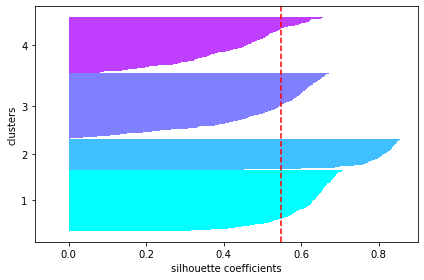

In [15]:
#bad-fitted cluster amount
%kmeans_clusters 4
%silhouette_plots 4

In [16]:
dhtml('Clusters as a Hierarchical Tree')

In [17]:
ac=scl.AgglomerativeClustering(n_clusters=3, 
                               affinity='euclidean', 
                               linkage='complete')
ac_labels=ac.fit_predict(X2)
print('Cluster labels: %s'%ac_labels)

Cluster labels: [2 2 0 1 0 1 0 0 0]


In [18]:
@register_line_magic
def dist_clusters(method):
    row_dist=pdist(df,metric='euclidean')
    if method=='False':
        row_dist=squareform(row_dist)
    row_clusters=linkage(row_dist,
                         method='complete',
                         metric='euclidean')
    c=row_clusters.shape[0]
    rc=pd.DataFrame(row_clusters,
                    columns=['row label 1','row label 2',
                             'distance','n_items'],
                    index=['cl%d'%(i+1) 
                           for i in range(c)])
    display(rc)
    fig=pl.figure(figsize=(8,8))
    axd=fig.add_axes([.1,.1,.31,.6])
    d=dendrogram(row_clusters,orientation='left',
                 labels=labels)
    df_cl=df.iloc[d['leaves'][::-1]]
    axd.set_xticks([]); axd.set_yticks([])
    for i in axd.spines.values():
        i.set_visible(False)
    axm=fig.add_axes([.2,.1,.6,.6])
    cax=axm.matshow(df_cl,interpolation='nearest',
                    cmap='cool')
    fig.colorbar(cax)
    ac=[str(ac_labels[int(el[2])-1])+'-'+el 
        for el in list(df_cl.index)]
    axm.set_xticklabels(['']+list(df_cl.columns))
    axm.set_yticklabels(['']+ac)
    if method=='False': pl.title('incorrect')
    else: pl.title('correct')
    pl.show()

,row label 1,row label 2,distance,n_items
cl1,7.0,8.0,3.789641,2.0
cl2,0.0,1.0,4.006657,2.0
cl3,2.0,6.0,4.211211,2.0
cl4,3.0,5.0,7.976674,2.0
cl5,4.0,11.0,8.332072,3.0
cl6,9.0,13.0,10.039070,5.0
cl7,10.0,12.0,16.286592,4.0
cl8,14.0,15.0,21.791271,9.0


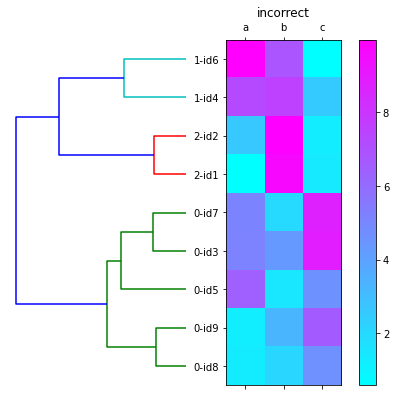

In [19]:
%dist_clusters False

,row label 1,row label 2,distance,n_items
cl1,0.0,1.0,2.051509,2.0
cl2,7.0,8.0,2.291503,2.0
cl3,2.0,6.0,2.348509,2.0
cl4,3.0,5.0,3.438063,2.0
cl5,4.0,11.0,5.304958,3.0
cl6,10.0,13.0,6.127972,5.0
cl7,9.0,12.0,9.821020,4.0
cl8,14.0,15.0,11.565539,9.0


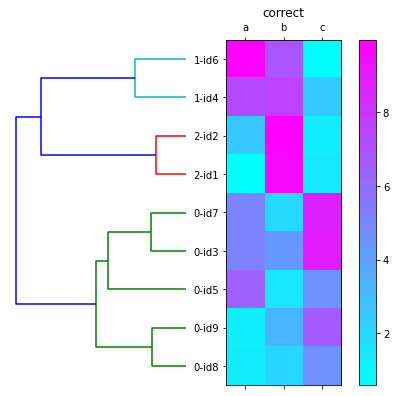

In [20]:
%dist_clusters True

In [21]:
dhtml('DBSCAN')

In [22]:
n_clusters=2
km=scl.KMeans(n_clusters=n_clusters,random_state=0)
y3_km=km.fit_predict(X3)
ac=scl.AgglomerativeClustering(n_clusters=n_clusters,
                               affinity='euclidean',
                               linkage='complete')
y3_ac=ac.fit_predict(X3)
db=scl.DBSCAN(eps=.2,min_samples=10,
              metric='euclidean')
y3_db=db.fit_predict(X3)
cl=['KMeans','Agglomerative','DBSCAN']
py3=[y3_km,y3_ac,y3_db]

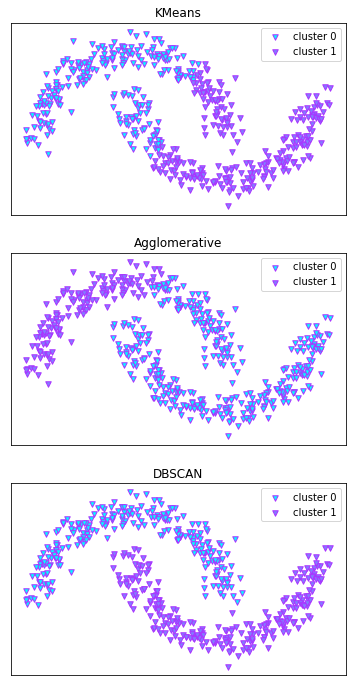

In [23]:
f,ax=pl.subplots(3,1,figsize=(6,12))
for c in range(3):
    for i in range(n_clusters):
        color=pl.cm.cool(float(i)/n_clusters)
        ax[c].scatter(X3[py3[c]==i,0],X3[py3[c]==i,1],
               s=30,color=color,marker='v',
               edgecolor='#aa33ff',
               label='cluster %d'%i)
    ax[c].legend(scatterpoints=1)
    ax[c].set_xticks([]); ax[c].set_yticks([])
    ax[c].set_title(cl[c]); 

In [24]:
dhtml('In Progress')